In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Import and load dataset
data = pd.read_json("fashion_products_data.ldjson", lines=True)

# 2. Data exploration: Features, column names, info, statistics, null values
print("="*50)
print("Columns in the Dataset:")
print(data.columns)
print("="*50)

print("Dataset Info:")
print(data.info())
print("="*50)

print("Statistical Summary (Numerical Data):")
print(data.describe())
print("="*50)

print("Null Values in Each Column:")
print(data.isnull().sum())
print("="*50)
for col in data.select_dtypes(include='object').columns:
    print(f"{col}")
    print(data[col].apply(type).value_counts())
print("="*50)
# 3. Drop unnecessary columns and retain selected features
columns_to_keep = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']
data = data[columns_to_keep]

print("Dataset after Retaining Selected Features:")
print(data.head())
print("="*50)


Columns in the Dataset:
Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'discount_percentage', 'colour',
       'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock',
       'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs',
       'formats___editions', 'name_of_author_for_books'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id       

asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64


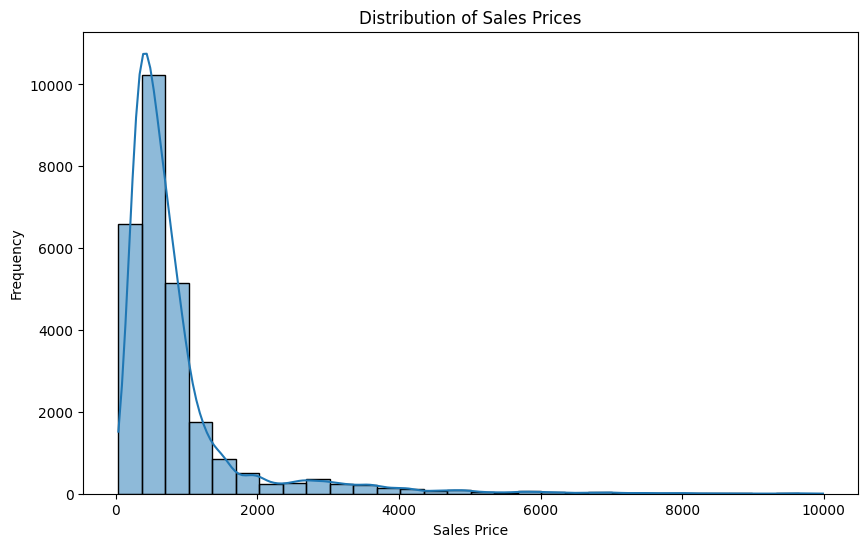

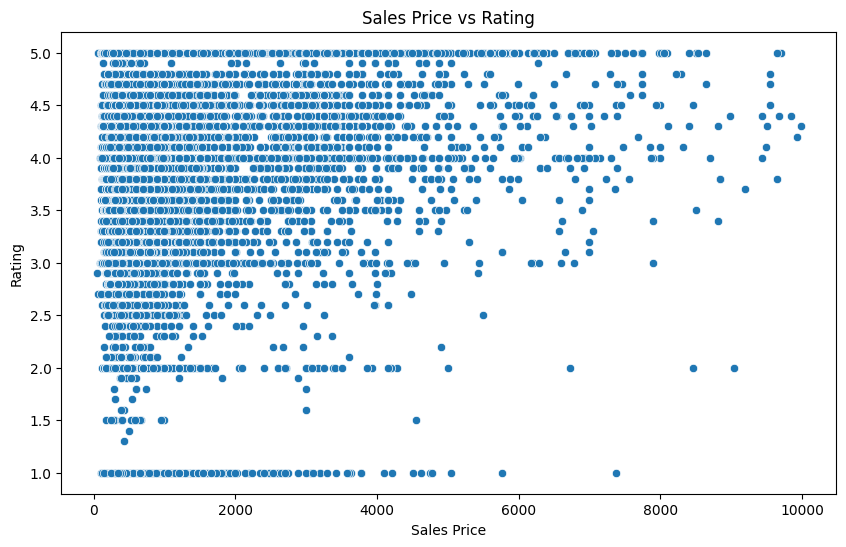

In [26]:
# 4. Check the nullvalues is present or not and handling null values and also remove duplicates also include visualization
print(data.isnull().sum())
data = data.fillna('')
data = data.drop_duplicates()
data['sales_price'] = pd.to_numeric(data['sales_price'], errors='coerce')
#Visualisations
plt.figure(figsize=(10, 6))
sns.histplot(data['sales_price'], bins=30, kde=True)
plt.title('Distribution of Sales Prices')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_price', y='rating', data=data)
plt.title('Sales Price vs Rating')
plt.xlabel('Sales Price')
plt.ylabel('Rating')
plt.show()


In [27]:

# 5. Remove and handle outliers
# Assuming that sales price has outliers
Q1 = data['sales_price'].quantile(0.25)
Q3 = data['sales_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
data = data[(data['sales_price'] >= lower_bound) & (data['sales_price'] <= upper_bound)]



In [28]:
# 6. Sort the rows based on the product name like alphabetical order for better recommendation
data = data.sort_values(by=['product_name'])



In [29]:
# 7. make fucntion to remove special and no english words, remove stopwords
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')

def preprocess_text( text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

data['product_name'] = data['product_name'].apply(preprocess_text)
data['meta_keywords'] = data['meta_keywords'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# 8. Convert shorter forms to longer forms (example)
def expand_abbreviations(text):
    abbreviations = {
        "w/": "with",
        "b/c": "because",
        "etc.": "et cetera",
        # Add more abbreviations as needed
    }
    for abbr, full in abbreviations.items():
        text = text.replace(abbr, full)
    return text

df['product_name'] = df['product_name'].apply(expand_abbreviations)





In [32]:
# 9. Stemming function using NLTK
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
stemmer = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['product_name'] = df['product_name'].apply(stem_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
